In [1]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# matplotlib 한글 문제 해결

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc  # resource config(
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # 맑은 글꼴
    rc('font', family=font_name)
else:
    rc('font', family="AppleGothic")
    
# 오류 대비 한줄 추가
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
raw_data = pd.read_excel('movie_crawling@.xlsx')
raw_data

,title,age,rating,genre,country,running_time,release
0,베일리 어게인,20대 여자,9.57,모험,미국,100분,2018.11.22 개봉
1,보헤미안 랩소디,20대 남자,9.57,드라마,영국,134분,2018.10.31 개봉
2,폴란드로 간 아이들,40대 여자,9.46,다큐멘터리,한국,79분,2018.10.31 개봉
3,아일라,20대 여자,9.47,드라마,기타,123분,2018.06.21 개봉
4,당갈,20대 여자,9.46,드라마,기타,161분,2018.04.25 개봉
5,덕구,20대 여자,9.45,드라마,한국,91분,2018.04.05 개봉
6,쇼생크 탈출,20대 남자,9.42,드라마,미국,142분,1995.01.28 개봉
7,원더,20대 여자,9.41,드라마,미국,113분,2017.12.27 개봉
8,터미네이터 2,20대 남자,9.40,SF,미국,137분,1991.07.06 개봉
9,인생은 아름다워,10대 남자,9.39,드라마,기타,116분,1999.03.06 개봉


## 전체영화 장르별 수

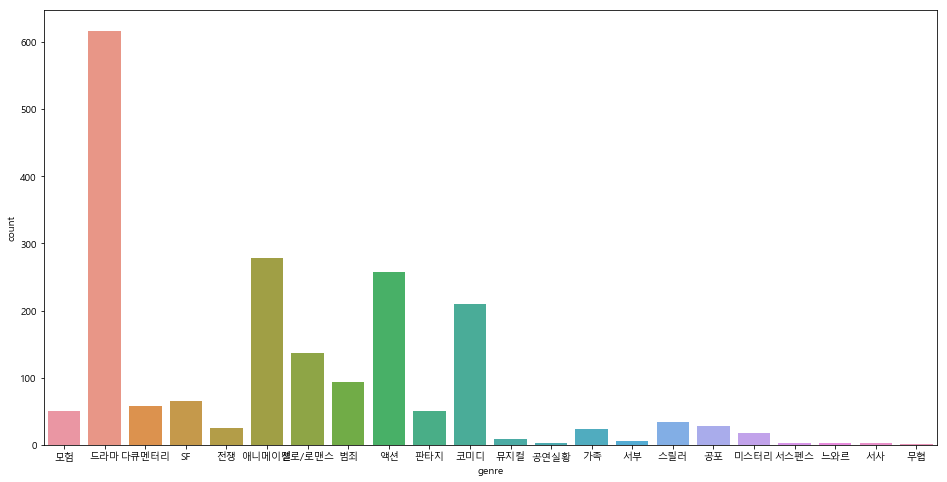

In [4]:
plt.figure(figsize=(16,8))
sns.countplot('genre',data=raw_data)

## 한국 영화 장르 분포

In [5]:
한국 = raw_data[raw_data['country'] == '한국']
한국

,title,age,rating,genre,country,running_time,release
2,폴란드로 간 아이들,40대 여자,9.46,다큐멘터리,한국,79분,2018.10.31 개봉
5,덕구,20대 여자,9.45,드라마,한국,91분,2018.04.05 개봉
20,살인의 추억,20대 남자,9.38,범죄,한국,132분,2003.04.25 개봉
27,아이 캔 스피크,20대 여자,9.36,드라마,한국,119분,2017.09.21 개봉
28,클래식,20대 남자,9.37,멜로/로맨스,한국,132분,2003.01.30 개봉
29,출국,40대 남자,8.99,드라마,한국,105분,2018.11.14 개봉
30,동주,20대 여자,9.36,드라마,한국,110분,2016.02.17 개봉
39,다시 태어나도 우리,40대 여자,9.34,다큐멘터리,한국,95분,2017.09.27 개봉
44,울지마 톤즈,10대 남자,9.34,다큐멘터리,한국,91분,2010.09.09 개봉
45,그대를 사랑합니다,20대 여자,9.34,드라마,한국,118분,2011.02.17 개봉


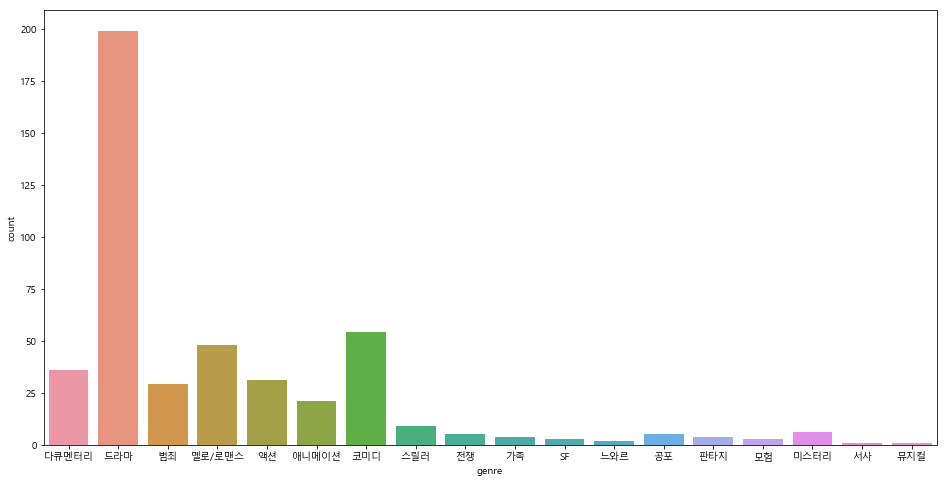

In [6]:
plt.figure(figsize=(16,8))
sns.countplot('genre',data=한국)

## 미국영화 장르 분포

In [7]:
미국 = raw_data[raw_data['country'] == '미국']
미국

,title,age,rating,genre,country,running_time,release
0,베일리 어게인,20대 여자,9.57,모험,미국,100분,2018.11.22 개봉
6,쇼생크 탈출,20대 남자,9.42,드라마,미국,142분,1995.01.28 개봉
7,원더,20대 여자,9.41,드라마,미국,113분,2017.12.27 개봉
8,터미네이터 2,20대 남자,9.40,SF,미국,137분,1991.07.06 개봉
10,매트릭스,20대 남자,9.39,SF,미국,136분,1999.05.15 개봉
11,라이언 일병 구하기,10대 남자,9.39,전쟁,미국,170분,1998.09.12 개봉
12,포레스트 검프,10대 남자,9.38,드라마,미국,142분,1994.10.15 개봉
13,죽은 시인의 사회,10대 남자,9.38,드라마,미국,128분,1990.05.19 개봉
14,빽 투 더 퓨쳐,10대 남자,9.39,SF,미국,120분,1987.07.17 개봉
15,월-E,20대 남자,9.38,애니메이션,미국,104분,2008.08.06 개봉


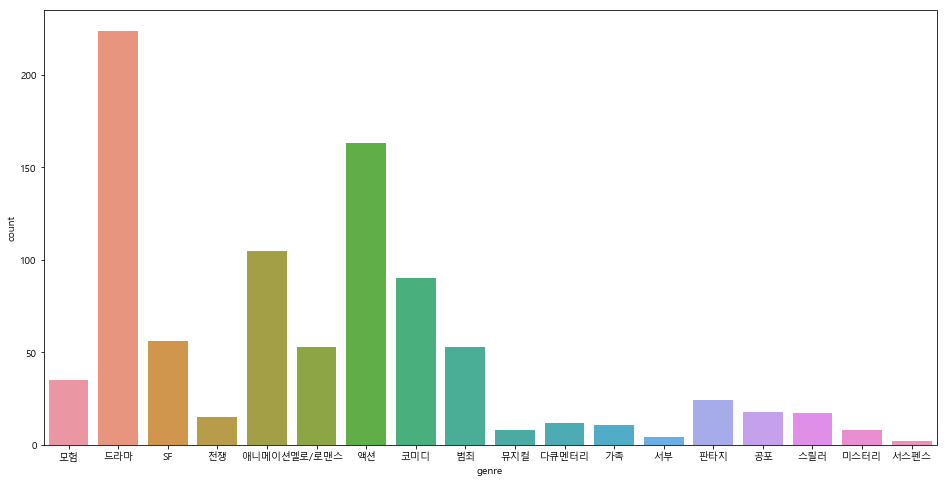

In [8]:
plt.figure(figsize=(16,8))
sns.countplot('genre',data=미국)

## 영국영화 장르 분포 

In [9]:
영국 = raw_data[raw_data['country'] == '영국']
영국

,title,age,rating,genre,country,running_time,release
1,보헤미안 랩소디,20대 남자,9.57,드라마,영국,134분,2018.10.31 개봉
62,빌리 엘리어트 뮤지컬 라이브,20대 여자,9.31,공연실황,영국,179분,2014.11.27 개봉
67,해리 포터와 죽음의 성물 - 2부,10대 여자,9.31,모험,영국,131분,2011.07.13 개봉
71,오페라의 유령 : 25주년 특별 공연,10대 여자,9.31,공연실황,영국,175분,2011.12.15 개봉
83,슈퍼소닉,20대 남자,9.30,다큐멘터리,영국,122분,2016.11.24 개봉
93,빌리 엘리어트,20대 여자,9.29,드라마,영국,110분,"2017.01.18 재개봉, 2001.02.17 개봉"
145,로미오와 줄리엣,10대 남자,9.26,드라마,영국,124분,1978.12.30 개봉
157,"나, 다니엘 블레이크",20대 여자,9.25,드라마,영국,100분,2016.12.08 개봉
180,해리 포터와 마법사의 돌,10대 여자,9.22,판타지,영국,152분,"2018.10.24 재개봉, 2001.12.14 개봉"
206,스쿨 오브 락,10대 남자,9.21,코미디,영국,109분,"2017.11.29 재개봉, 2004.02.27 개봉"


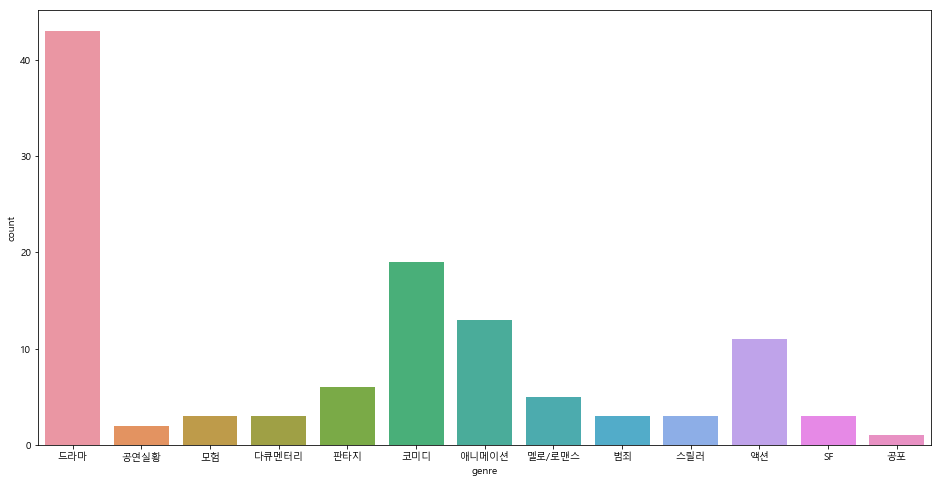

In [10]:
plt.figure(figsize=(16,8))
sns.countplot('genre',data=영국)

## 일본영화 장르분포

In [11]:
일본 = raw_data[raw_data['country'] == '일본']
일본

,title,age,rating,genre,country,running_time,release
22,센과 치히로의 행방불명,10대 여자,9.37,애니메이션,일본,126분,2002.06.28 개봉
48,"지금, 만나러 갑니다",20대 남자,9.34,멜로/로맨스,일본,118분,2005.03.25 개봉
56,모노노케 히메,10대 남자,9.33,애니메이션,일본,135분,2003.04.25 개봉
78,천공의 성 라퓨타,10대 남자,9.30,애니메이션,일본,124분,2004.04.30 개봉
119,바람계곡의 나우시카,10대 남자,9.27,애니메이션,일본,116분,2000.12.30 개봉
120,명탐정 코난: 베이커가의 망령,10대 여자,9.26,애니메이션,일본,106분,2008.05.01 개봉
133,고 녀석 맛나겠다,10대 여자,9.25,애니메이션,일본,89분,2011.07.07 개봉
151,갓파 쿠와 여름방학을,10대 여자,9.24,애니메이션,일본,138분,"2016.08.25 재개봉, 2008.06.26 개봉"
160,보루토 - 나루토 더 무비,20대 남자,9.23,애니메이션,일본,95분,2015.12.10 개봉
165,어느 가족,20대 여자,9.23,드라마,일본,121분,2018.07.26 개봉


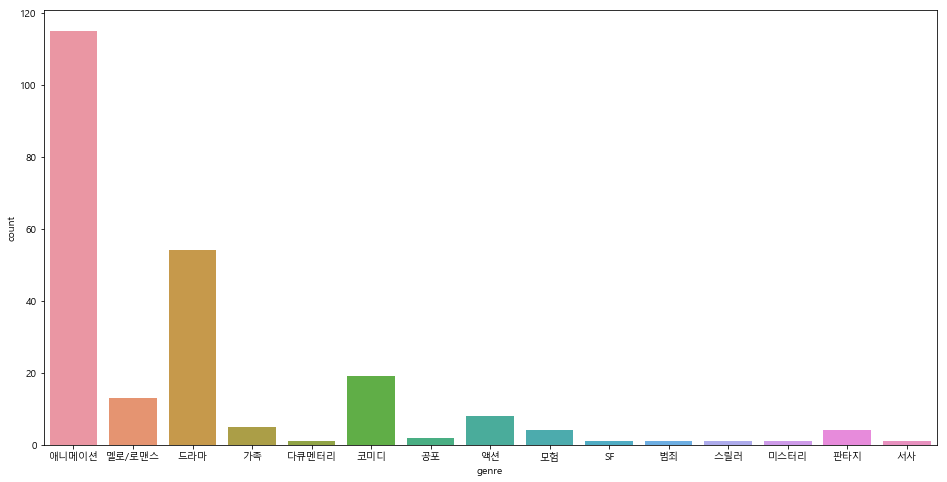

In [12]:
plt.figure(figsize=(16,8))
sns.countplot('genre',data=일본)

## 중국영화 장르 분포

In [13]:
중국 = raw_data[raw_data['country'] == '중국']
중국

,title,age,rating,genre,country,running_time,release
25,패왕별희,20대 여자,9.37,드라마,중국,171분,1993.12.24 개봉
125,인생,20대 남자,9.27,드라마,중국,125분,1995.05.27 개봉
144,투게더,20대 여자,9.24,드라마,중국,117분,2003.03.14 개봉
150,집으로 가는 길,20대 남자,9.25,드라마,중국,89분,2000.11.04 개봉
330,책상 서랍 속의 동화,10대 남자,9.12,드라마,중국,106분,1999.10.30 개봉
484,산이 울다,40대 남자,9.02,드라마,중국,107분,2016.05.25 개봉
521,진링의 13소녀,20대 여자,8.98,전쟁,중국,146분,2013.11.14 개봉
546,"안녕, 나의 소울메이트",20대 여자,8.95,드라마,중국,110분,2017.12.07 개봉
561,5일의 마중,20대 여자,8.95,드라마,중국,109분,2014.10.08 개봉
1069,페인티드 베일,20대 여자,8.60,멜로/로맨스,중국,124분,2007.03.15 개봉


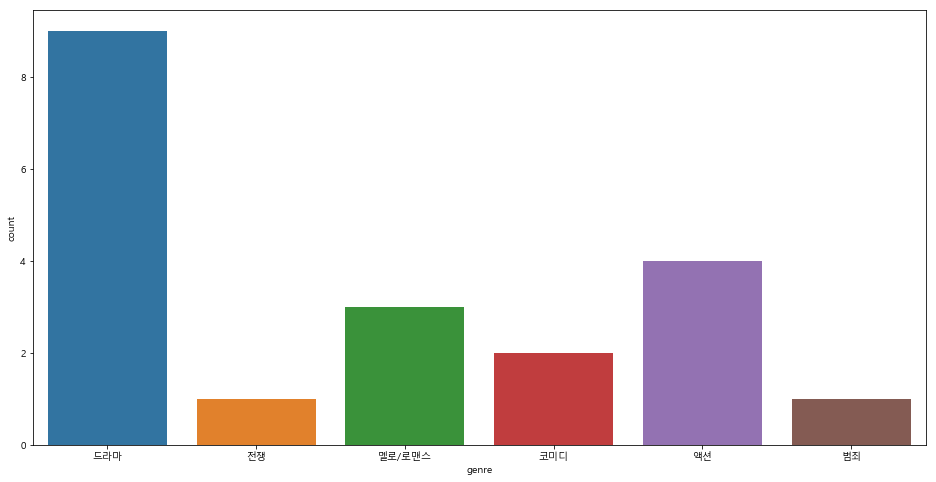

In [14]:
plt.figure(figsize=(16,8))
sns.countplot('genre',data=중국)

## 기타국가 영화 장르분포

In [15]:
기타 = raw_data[raw_data['country'] == '기타']
기타

,title,age,rating,genre,country,running_time,release
3,아일라,20대 여자,9.47,드라마,기타,123분,2018.06.21 개봉
4,당갈,20대 여자,9.46,드라마,기타,161분,2018.04.25 개봉
9,인생은 아름다워,10대 남자,9.39,드라마,기타,116분,1999.03.06 개봉
24,반지의 제왕: 왕의 귀환,10대 남자,9.36,판타지,기타,263분,2003.12.17 개봉
26,레옹,20대 남자,9.36,범죄,기타,110분,1995.02.18 개봉
34,반지의 제왕: 두 개의 탑,10대 남자,9.34,판타지,기타,235분,2002.12.19 개봉
38,서유기 2 - 선리기연,20대 남자,9.35,코미디,기타,99분,2010.06.01 개봉
40,세 얼간이,10대 남자,9.34,코미디,기타,141분,2011.08.18 개봉
49,언터처블: 1%의 우정,10대 남자,9.34,코미디,기타,112분,2012.03.22 개봉
52,프린스 앤 프린세스,10대 여자,9.34,애니메이션,기타,67분,2001.05.05 개봉


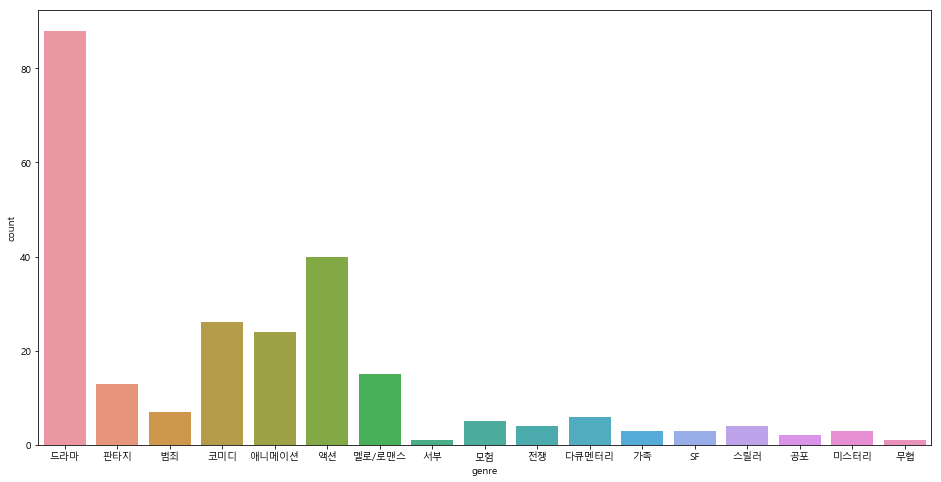

In [16]:
plt.figure(figsize=(16,8))
sns.countplot('genre',data=기타)

## 국가별 영화 수

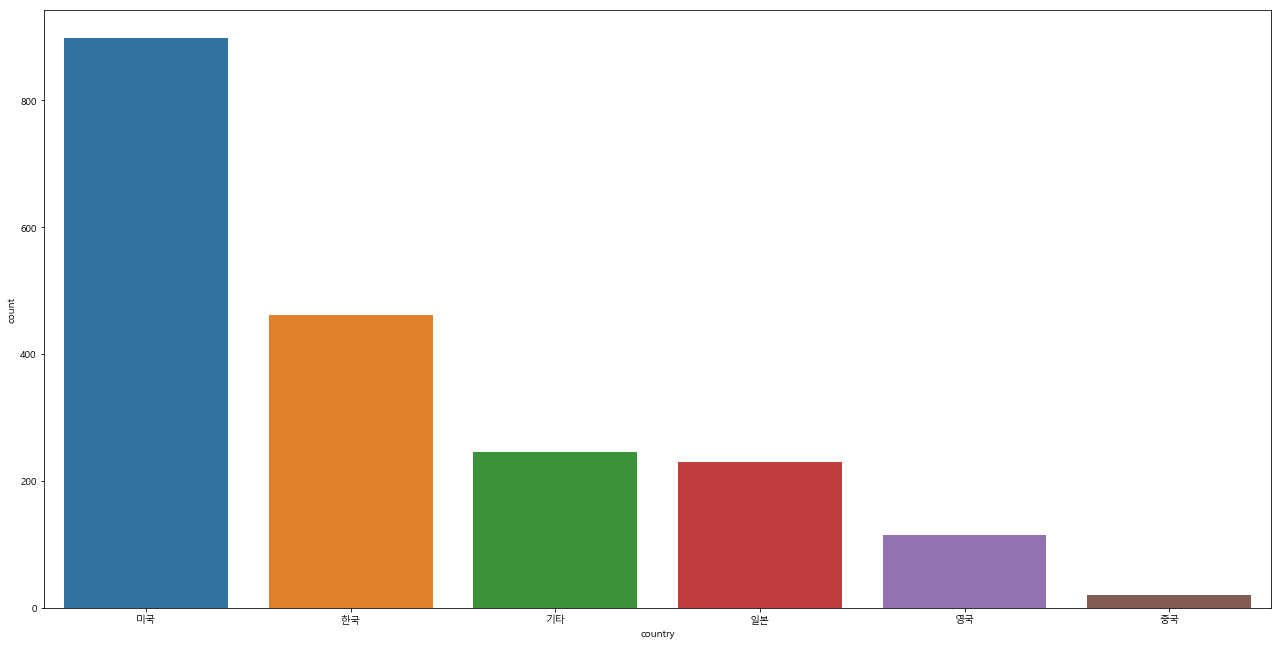

In [17]:
plt.figure(figsize=(22,11))
sns.countplot('country',data=raw_data, order = raw_data['country'].value_counts().index)

## 국가별 장르 분포

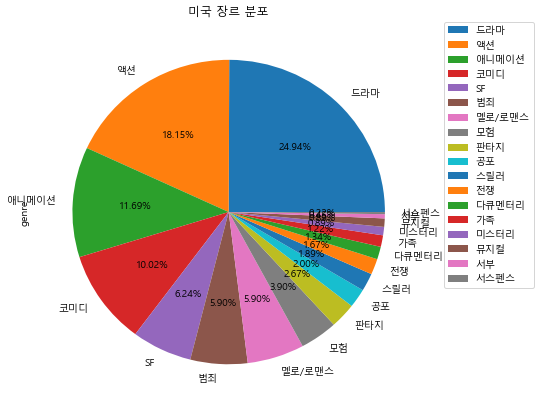

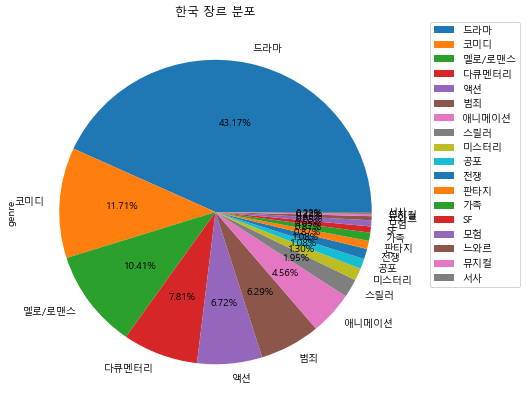

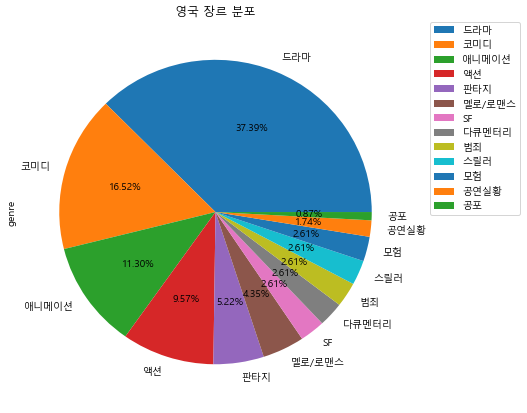

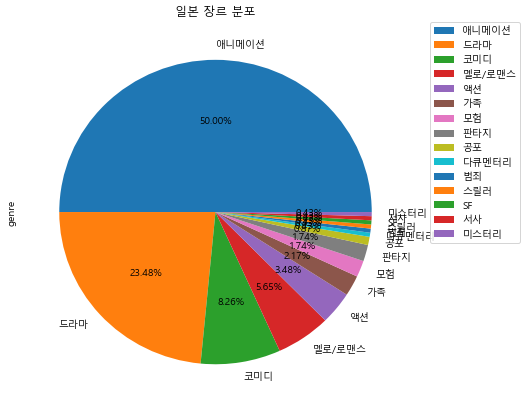

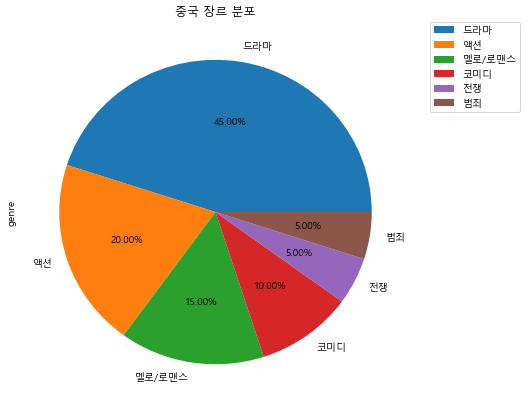

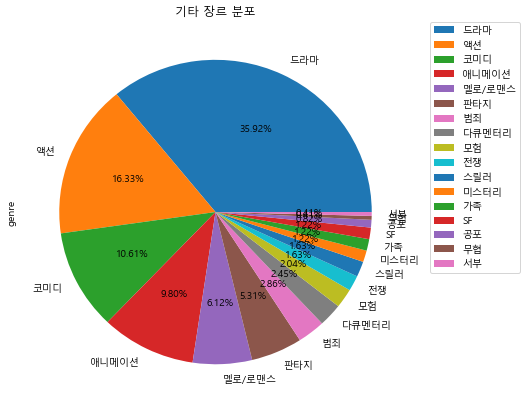

In [18]:
plt.figure(figsize=(7,7))
# g = plt.pie("country",hue="genre", data=df)
미국['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("미국 장르 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(7,7))
# g = plt.pie("country",hue="genre", data=df)
한국['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("한국 장르 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(7,7))
# g = plt.pie("country",hue="genre", data=df)
영국['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("영국 장르 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(7,7))
# g = plt.pie("country",hue="genre", data=df)
일본['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("일본 장르 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(7,7))
# g = plt.pie("country",hue="genre", data=df)
중국['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("중국 장르 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(7,7))
# g = plt.pie("country",hue="genre", data=df)
기타['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("기타 장르 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


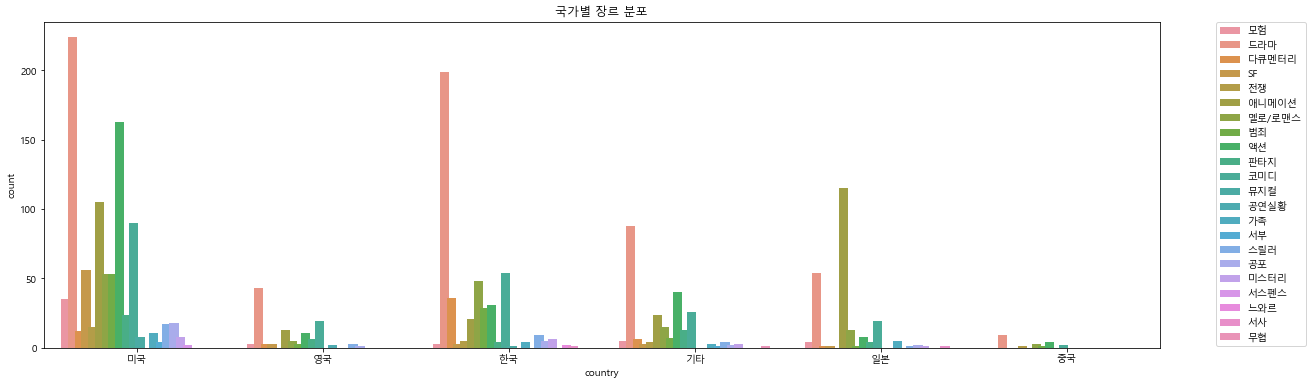

In [19]:
plt.figure(figsize=(20,6))
g = sns.countplot("country",hue="genre", data=raw_data)
plt.title("국가별 장르 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(g, .05)

plt.show()

## 국가별 영화수

In [20]:
raw_data['country'].value_counts()

미국    898
한국    461
기타    245
일본    230
영국    115
중국     20
Name: country, dtype: int64

## 한국 미국 장르 별 개수

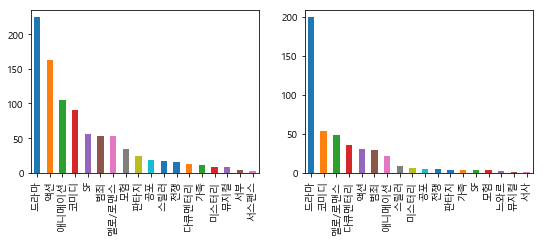

In [21]:
plt.figure(2, figsize=(9,3))
plt.subplot(121)
미국['genre'].value_counts().plot(kind='bar')
plt.subplot(122)
한국['genre'].value_counts().plot(kind='bar')
# 미국['genre'].value_counts()
# 한국['genre'].value_counts()

In [22]:
미국['genre'].value_counts()

드라마       224
액션        163
애니메이션     105
코미디        90
SF         56
범죄         53
멜로/로맨스     53
모험         35
판타지        24
공포         18
스릴러        17
전쟁         15
다큐멘터리      12
가족         11
미스터리        8
뮤지컬         8
서부          4
서스펜스        2
Name: genre, dtype: int64

In [23]:
한국['genre'].value_counts()

드라마       199
코미디        54
멜로/로맨스     48
다큐멘터리      36
액션         31
범죄         29
애니메이션      21
스릴러         9
미스터리        6
공포          5
전쟁          5
판타지         4
가족          4
SF          3
모험          3
느와르         2
뮤지컬         1
서사          1
Name: genre, dtype: int64

## 한국영화 10대 장르 분석

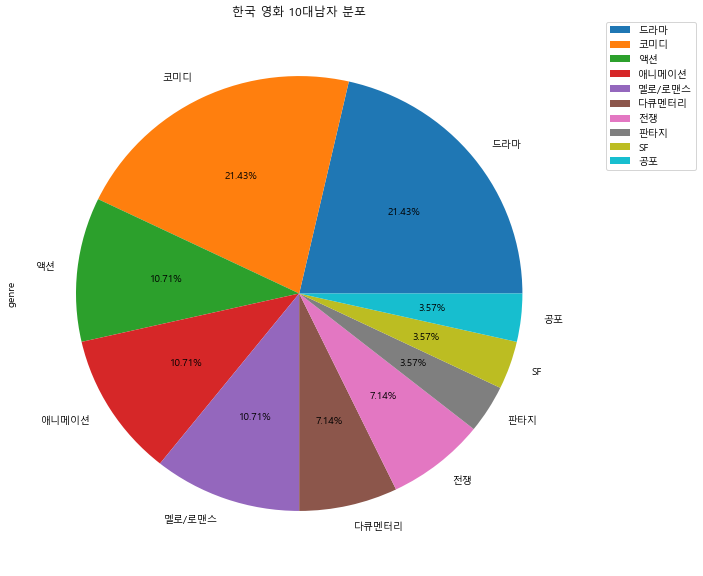

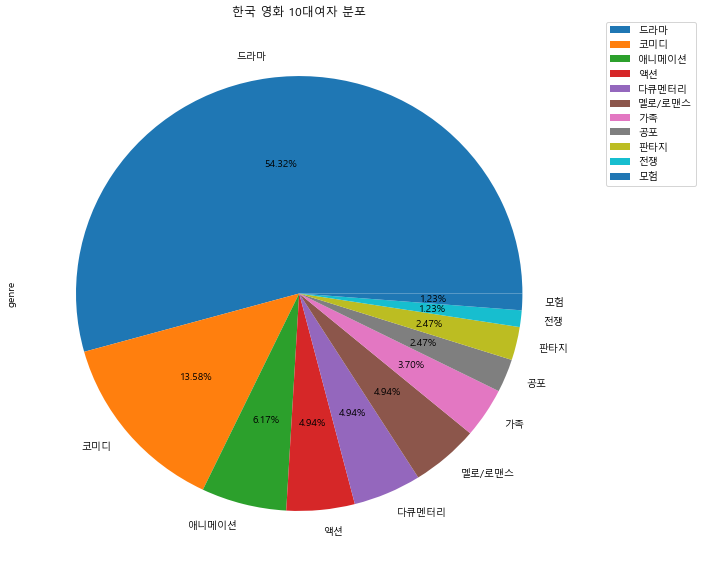

In [46]:
한국 = raw_data[raw_data['country'] == "한국"]
한국연령대 = 한국[한국['age'] == "10대 남자"]
한국연령대.age.value_counts()

plt.figure(figsize=(10,10))
한국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("한국 영화 10대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

한국 = raw_data[raw_data['country'] == "한국"]
한국연령대 = 한국[한국['age'] == "10대 여자"]
한국연령대.age.value_counts()

plt.figure(figsize=(10,10))
한국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("한국 영화 10대여자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 한국영화 20대 장르 분석

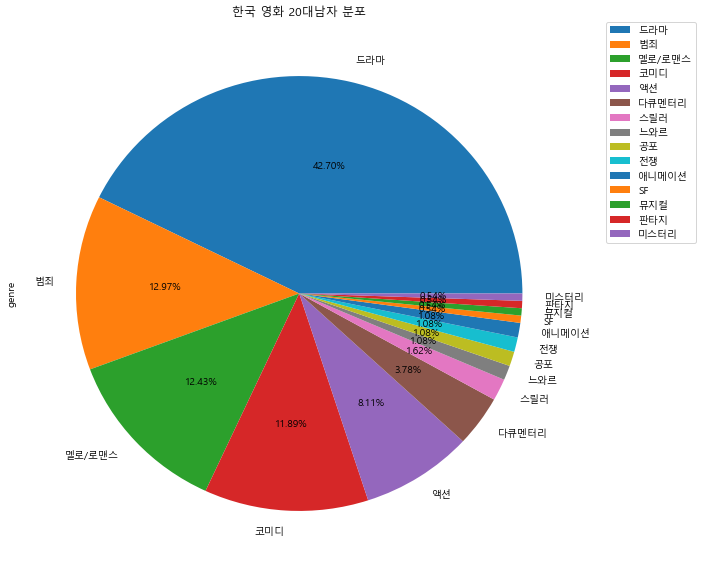

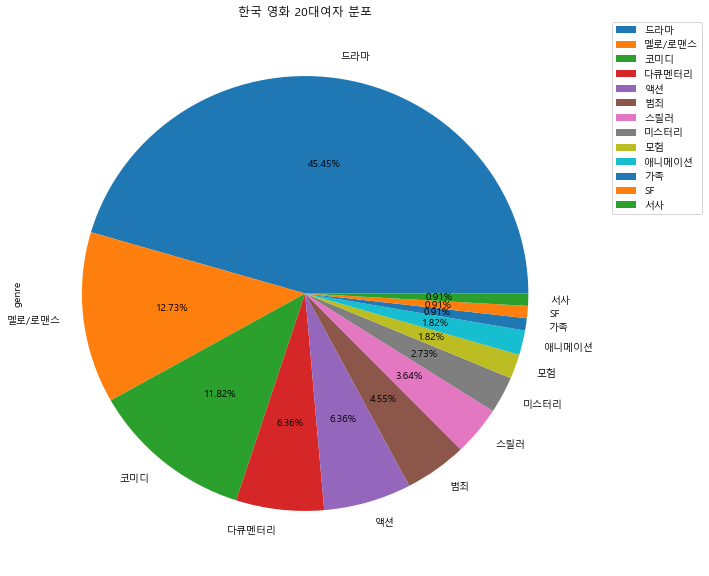

In [47]:
한국 = raw_data[raw_data['country'] == "한국"]
한국연령대 = 한국[한국['age'] == "20대 남자"]
한국연령대.age.value_counts()

plt.figure(figsize=(10,10))
한국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("한국 영화 20대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

한국 = raw_data[raw_data['country'] == "한국"]
한국연령대 = 한국[한국['age'] == "20대 여자"]
한국연령대.age.value_counts()

plt.figure(figsize=(10,10))
한국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("한국 영화 20대여자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 한국영화 30대 장르 분석

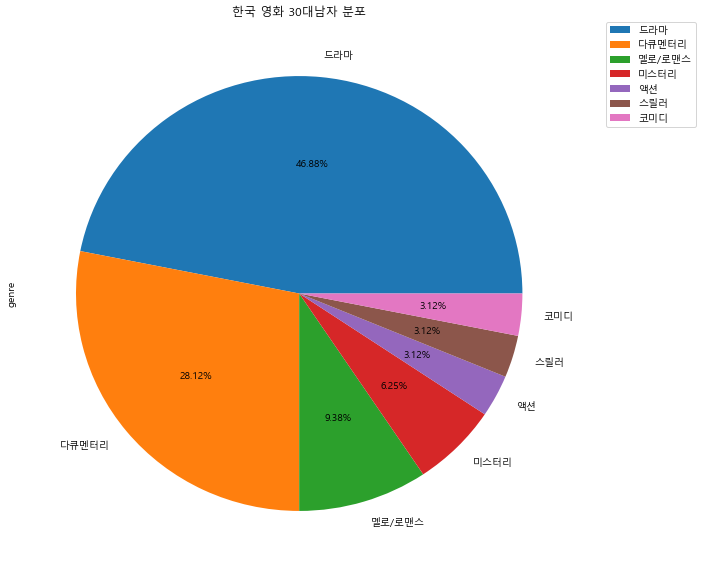

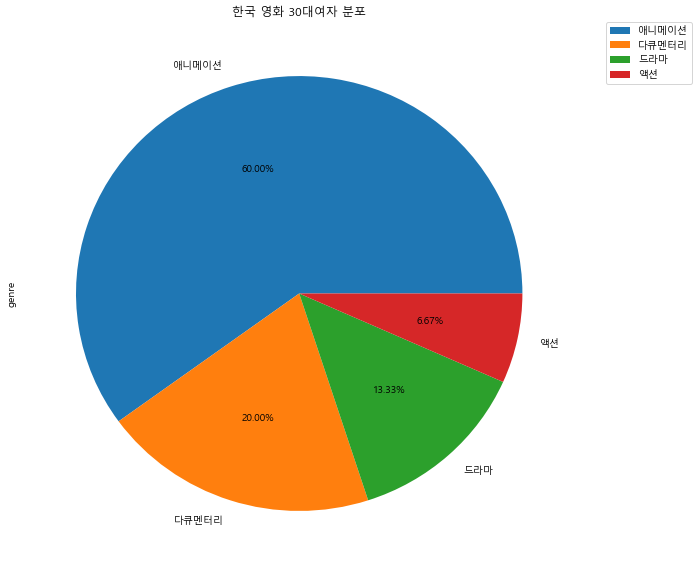

In [48]:
한국 = raw_data[raw_data['country'] == "한국"]
한국연령대 = 한국[한국['age'] == "30대 남자"]
한국연령대.age.value_counts()

plt.figure(figsize=(10,10))
한국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("한국 영화 30대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

한국 = raw_data[raw_data['country'] == "한국"]
한국연령대 = 한국[한국['age'] == "30대 여자"]
한국연령대.age.value_counts()

plt.figure(figsize=(10,10))
한국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("한국 영화 30대여자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 미국영화 10대 장르 분석

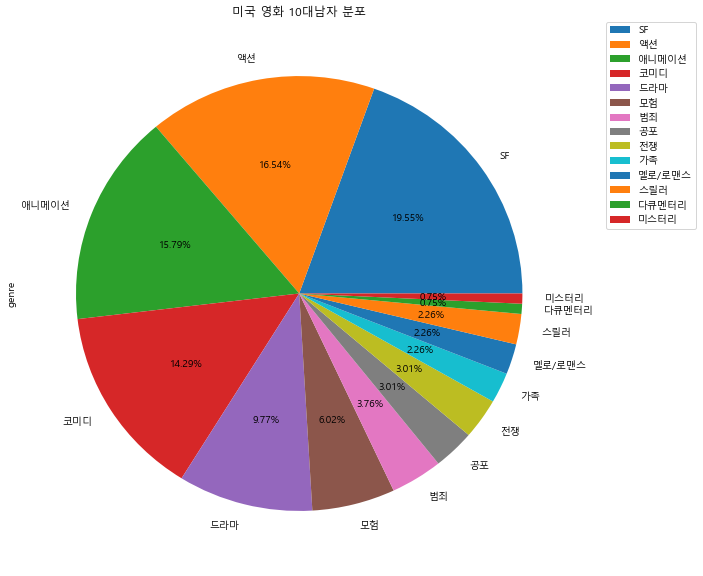

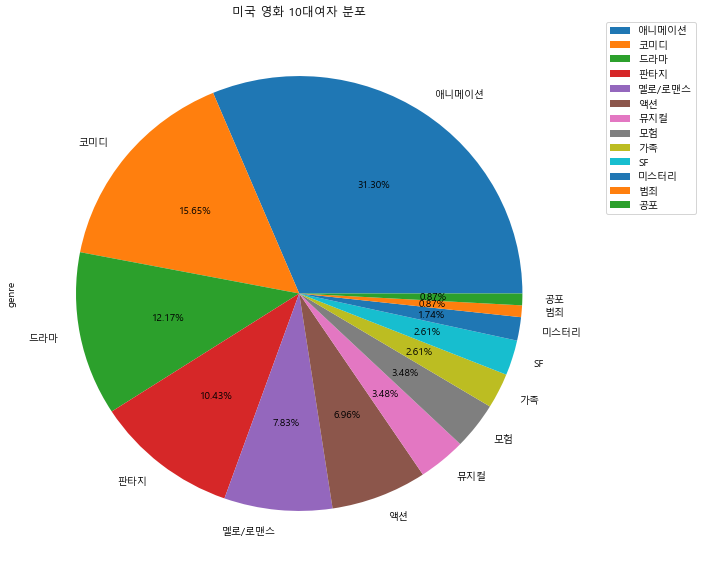

In [49]:
미국 = raw_data[raw_data['country'] == "미국"]
미국연령대 = 미국[미국['age'] == "10대 남자"]
영국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
미국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("미국 영화 10대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

미국 = raw_data[raw_data['country'] == "미국"]
미국연령대 = 미국[미국['age'] == "10대 여자"]
미국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
미국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("미국 영화 10대여자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 미국영화 20대 장르 분석

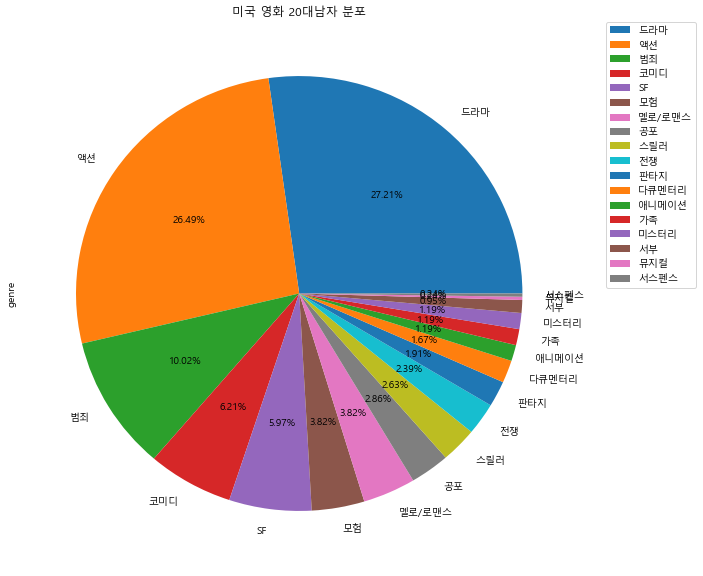

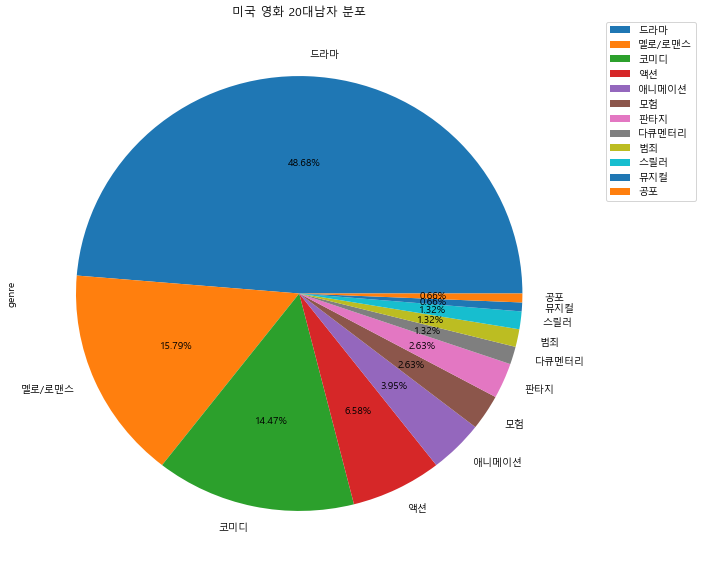

In [50]:
미국 = raw_data[raw_data['country'] == "미국"]
미국연령대 = 미국[미국['age'] == "20대 남자"]
영국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
미국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("미국 영화 20대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

미국 = raw_data[raw_data['country'] == "미국"]
미국연령대 = 미국[미국['age'] == "20대 여자"]
미국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
미국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("미국 영화 20대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 미국영화 30대 장르 분석

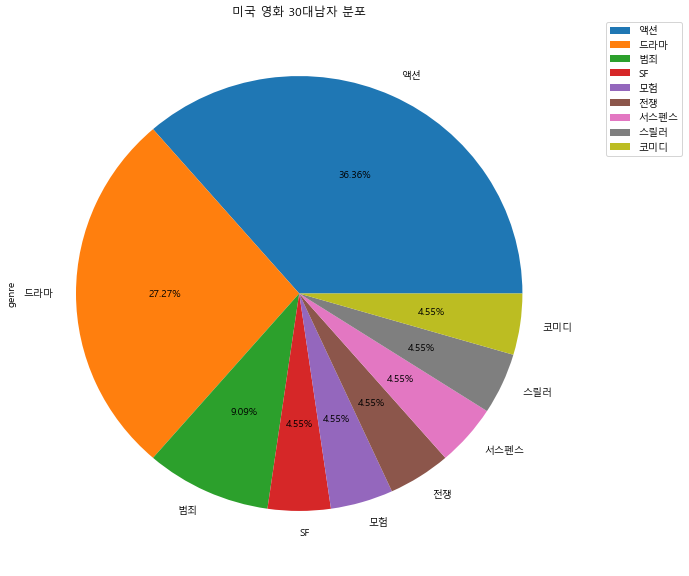

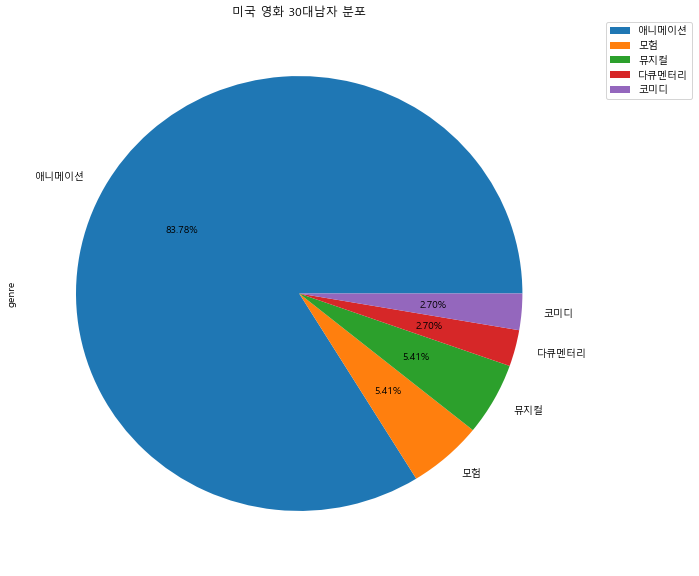

In [52]:
미국 = raw_data[raw_data['country'] == "미국"]
미국연령대 = 미국[미국['age'] == "30대 남자"]
영국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
미국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("미국 영화 30대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

미국 = raw_data[raw_data['country'] == "미국"]
미국연령대 = 미국[미국['age'] == "30대 여자"]
미국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
미국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("미국 영화 30대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 영국영화 10대 장르 분석

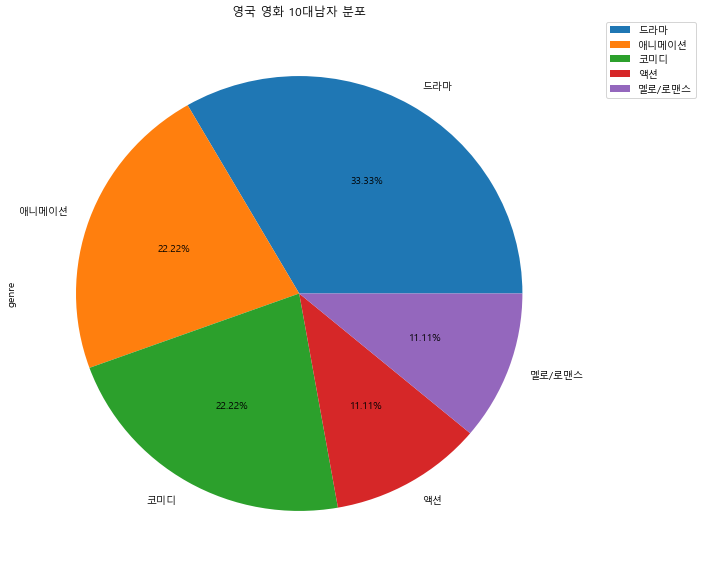

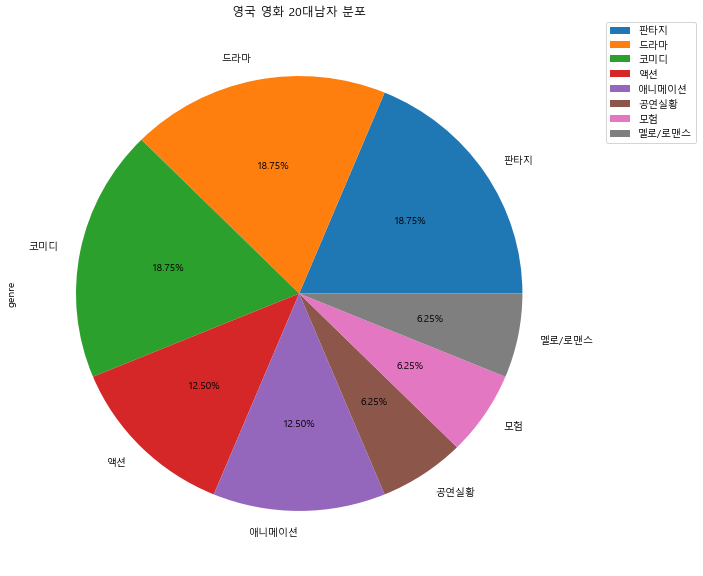

In [56]:
영국 = raw_data[raw_data['country'] == "영국"]
영국연령대 = 영국[영국['age'] == "10대 남자"]
영국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
영국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("영국 영화 10대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

영국 = raw_data[raw_data['country'] == "영국"]
영국연령대 = 영국[영국['age'] == "10대 여자"]
영국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
영국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("영국 영화 20대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 영국영화 20대 장르 분석

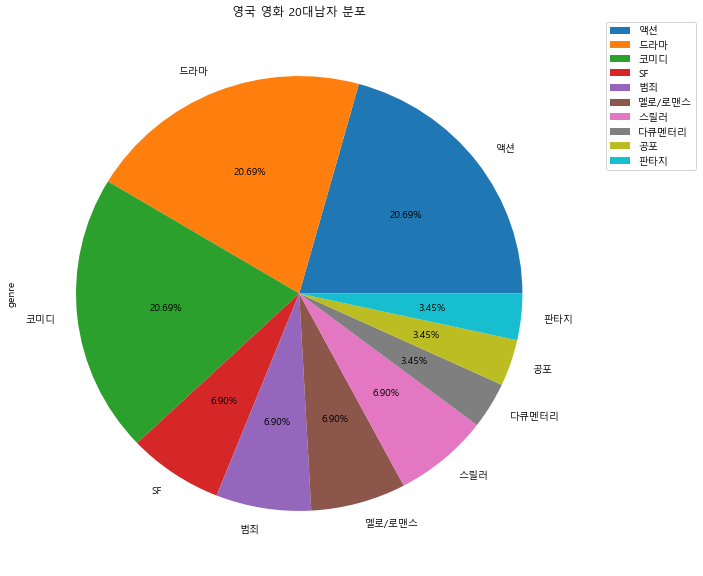

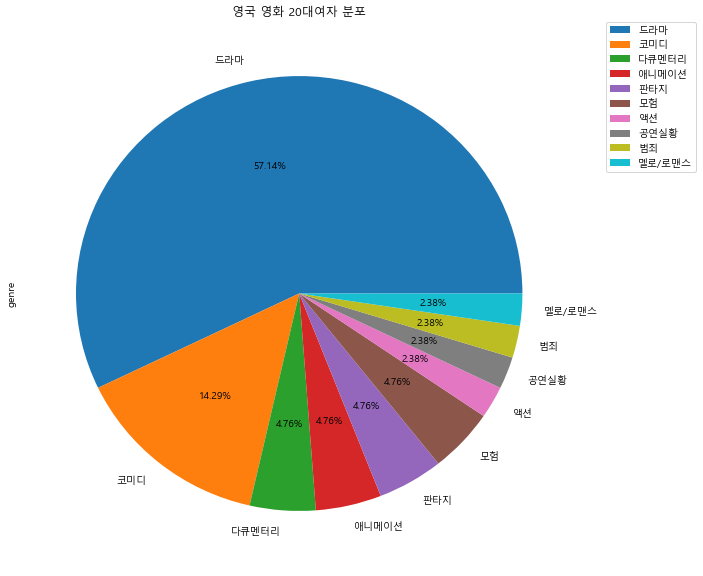

In [60]:
영국 = raw_data[raw_data['country'] == "영국"]
영국연령대 = 영국[영국['age'] == "20대 남자"]
영국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
영국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("영국 영화 20대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

영국 = raw_data[raw_data['country'] == "영국"]
영국연령대 = 영국[영국['age'] == "20대 여자"]
영국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
영국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("영국 영화 20대여자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 영국영화 30대 장르 분석

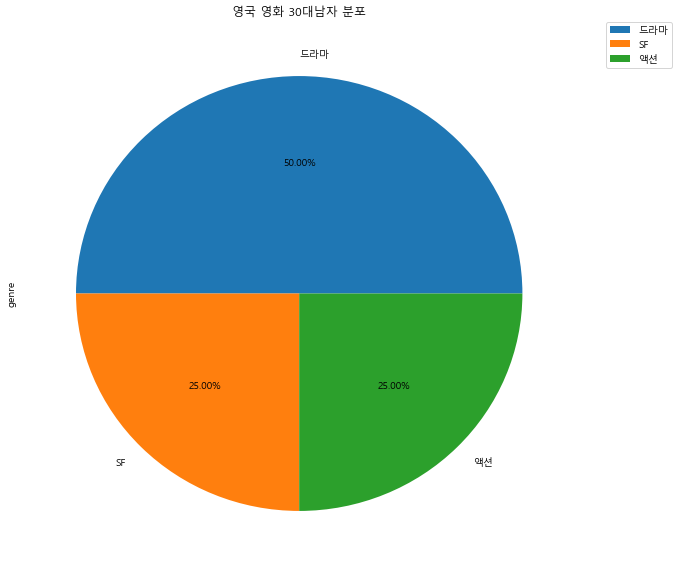

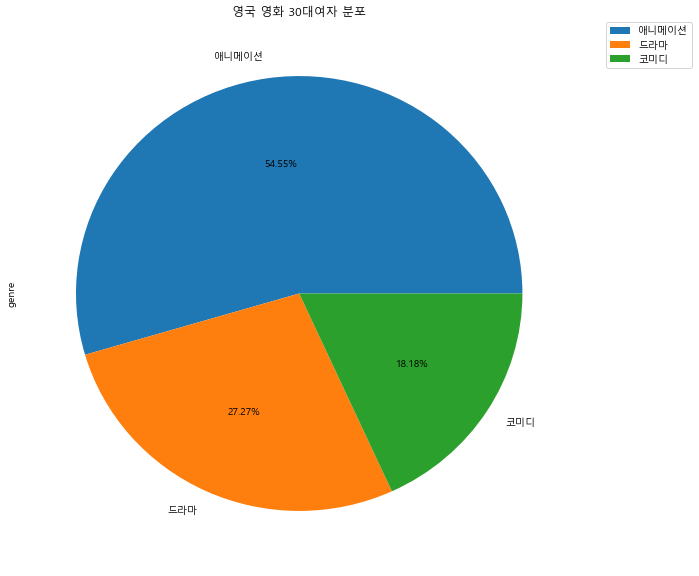

In [59]:
영국 = raw_data[raw_data['country'] == "영국"]
영국연령대 = 영국[영국['age'] == "30대 남자"]
영국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
영국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("영국 영화 30대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

영국 = raw_data[raw_data['country'] == "영국"]
영국연령대 = 영국[영국['age'] == "30대 여자"]
영국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
영국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("영국 영화 30대여자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 중국영화 10대 장르 분석

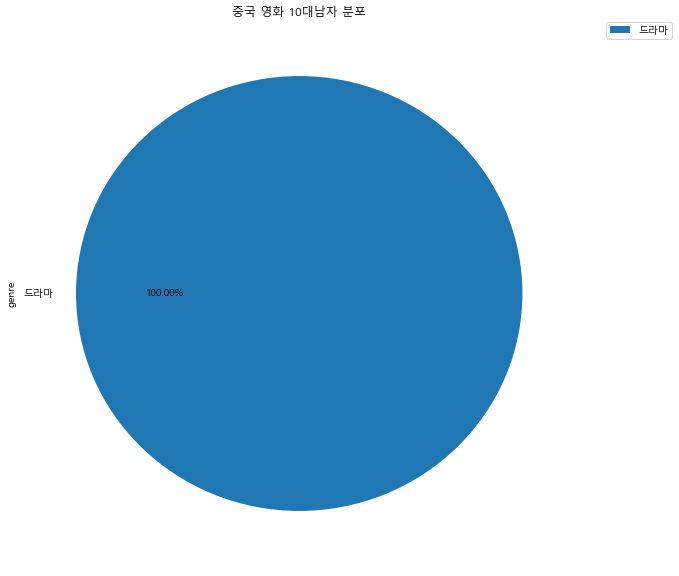

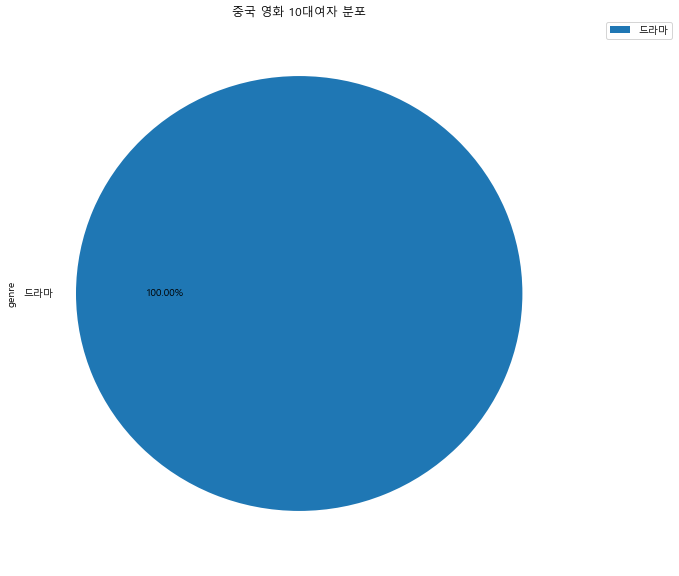

In [37]:
중국 = raw_data[raw_data['country'] == "중국"]
중국연령대 = 중국[중국['age'] == "10대 남자"]
중국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
중국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("중국 영화 10대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

중국 = raw_data[raw_data['country'] == "중국"]
중국연령대 = 중국[중국['age'] == "10대 여자"]
중국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
중국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("중국 영화 10대여자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 중국영화 20대 장르 분석

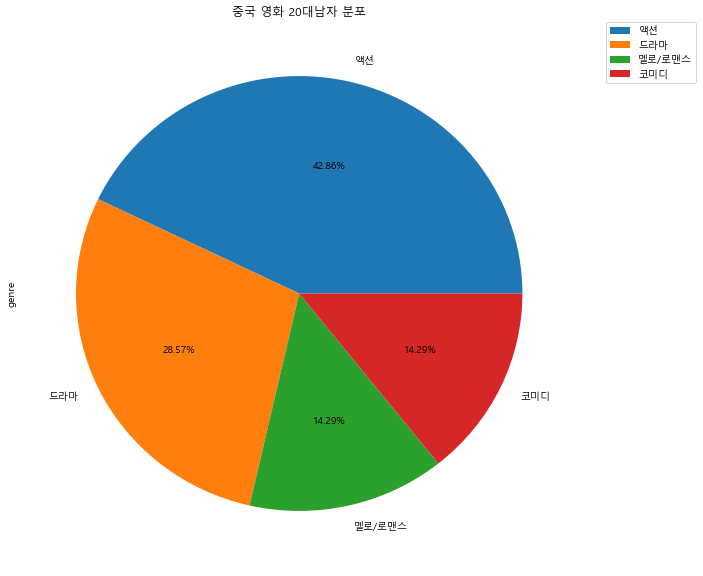

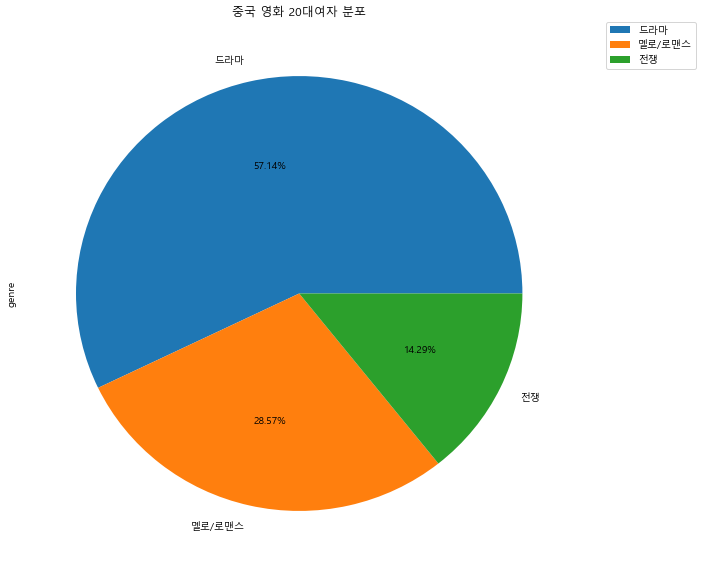

In [39]:
중국 = raw_data[raw_data['country'] == "중국"]
중국연령대 = 중국[중국['age'] == "20대 남자"]
중국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
중국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("중국 영화 20대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

중국 = raw_data[raw_data['country'] == "중국"]
중국연령대 = 중국[중국['age'] == "20대 여자"]
중국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
중국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("중국 영화 20대여자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 중국영화 30대 장르 분석

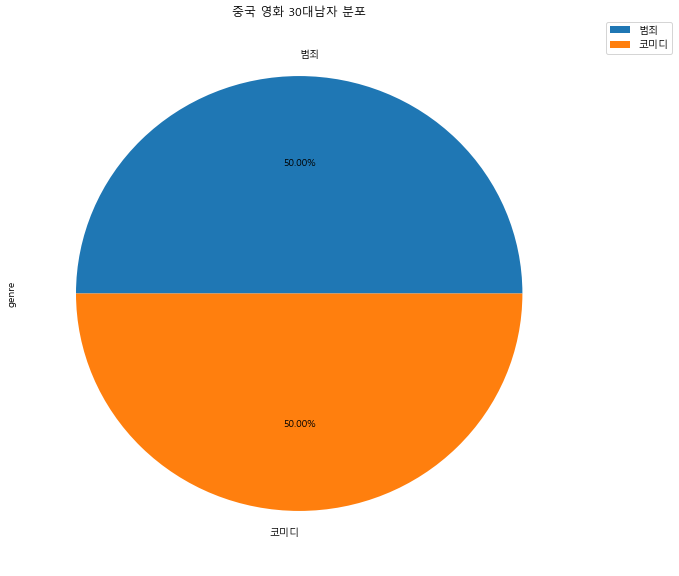

In [41]:
중국 = raw_data[raw_data['country'] == "중국"]
중국연령대 = 중국[중국['age'] == "30대 남자"]
중국연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
중국연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("중국 영화 30대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## 일본영화 10대 장르 분석

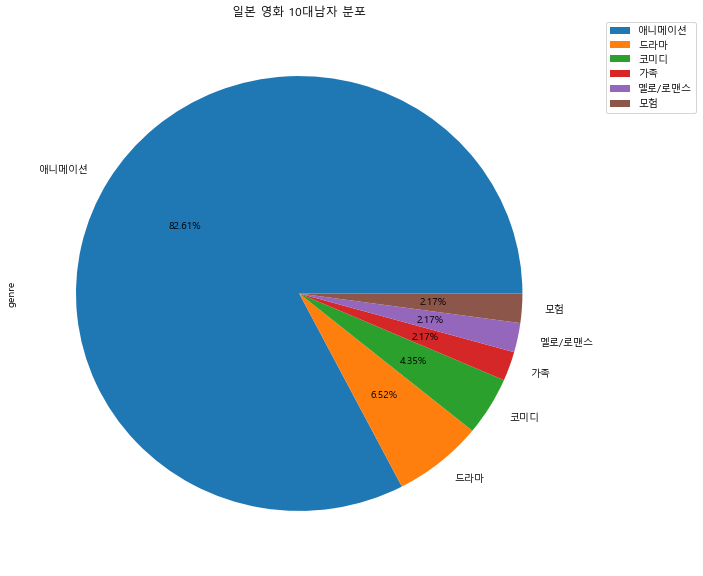

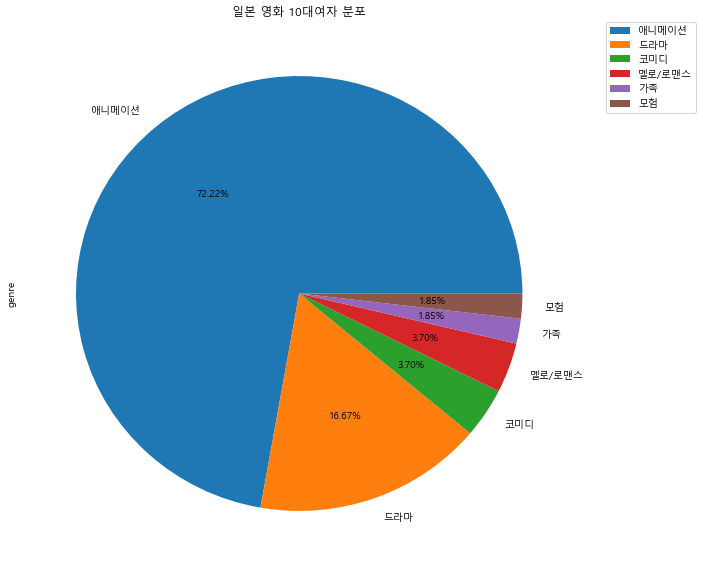

In [42]:
일본 = raw_data[raw_data['country'] == "일본"]
일본연령대 = 일본[일본['age'] == "10대 남자"]
일본연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
일본연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("일본 영화 10대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

일본 = raw_data[raw_data['country'] == "일본"]
일본연령대 = 일본[일본['age'] == "10대 여자"]
일본연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
일본연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("일본 영화 10대여자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 일본영화 20대 장르 분석

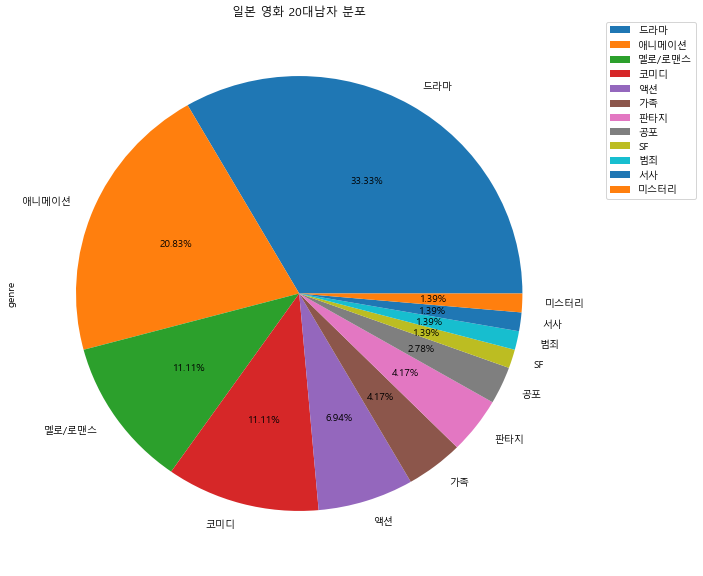

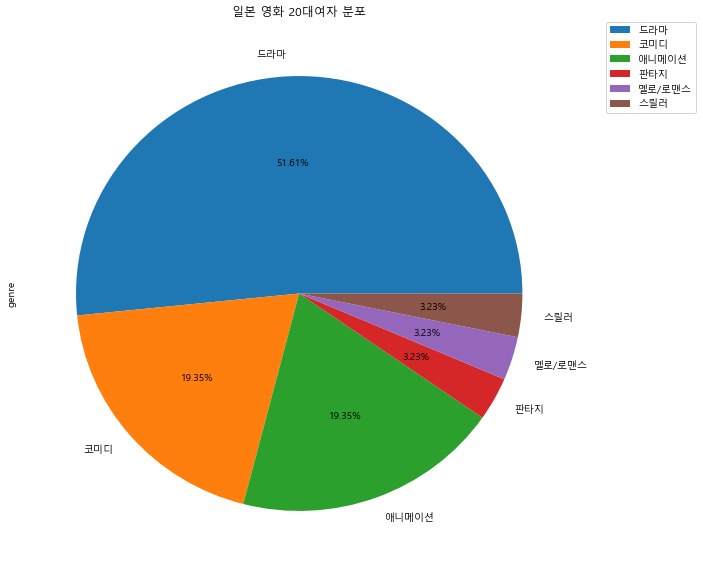

In [43]:
일본 = raw_data[raw_data['country'] == "일본"]
일본연령대 = 일본[일본['age'] == "20대 남자"]
일본연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
일본연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("일본 영화 20대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

일본 = raw_data[raw_data['country'] == "일본"]
일본연령대 = 일본[일본['age'] == "20대 여자"]
일본연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
일본연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("일본 영화 20대여자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 일본영화 30대 장르 분석

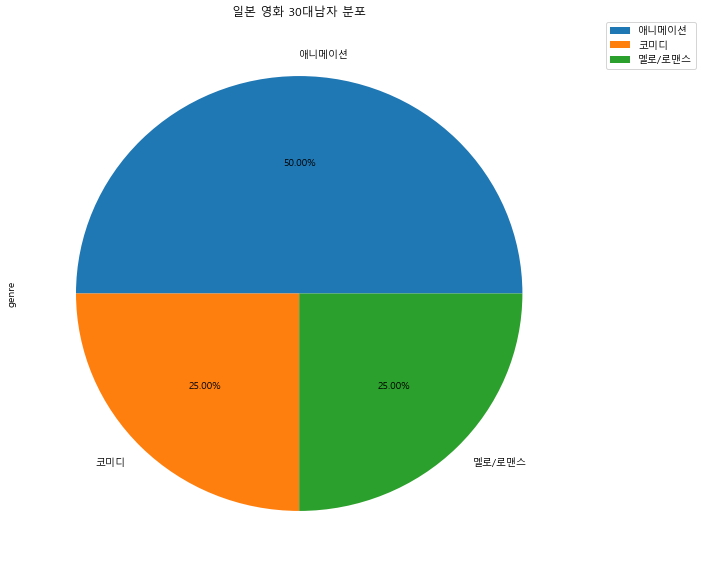

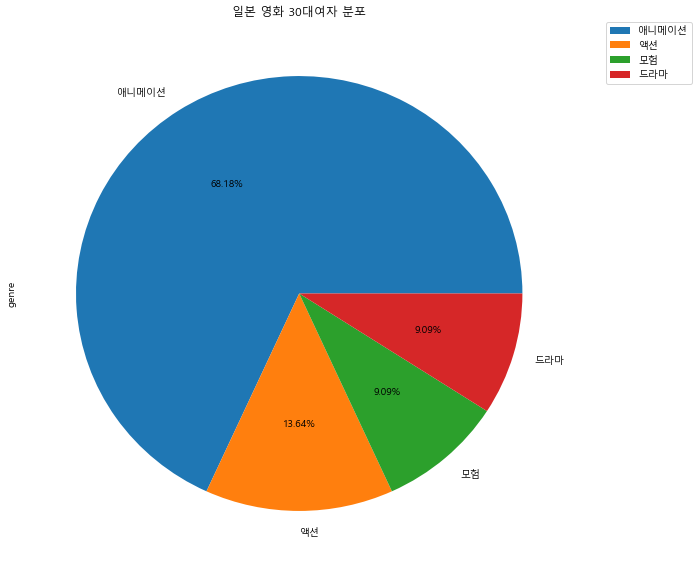

In [44]:
일본 = raw_data[raw_data['country'] == "일본"]
일본연령대 = 일본[일본['age'] == "30대 남자"]
일본연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
일본연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("일본 영화 30대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

일본 = raw_data[raw_data['country'] == "일본"]
일본연령대 = 일본[일본['age'] == "30대 여자"]
일본연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
일본연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("일본 영화 30대여자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 기타영화 10대 장르 분포

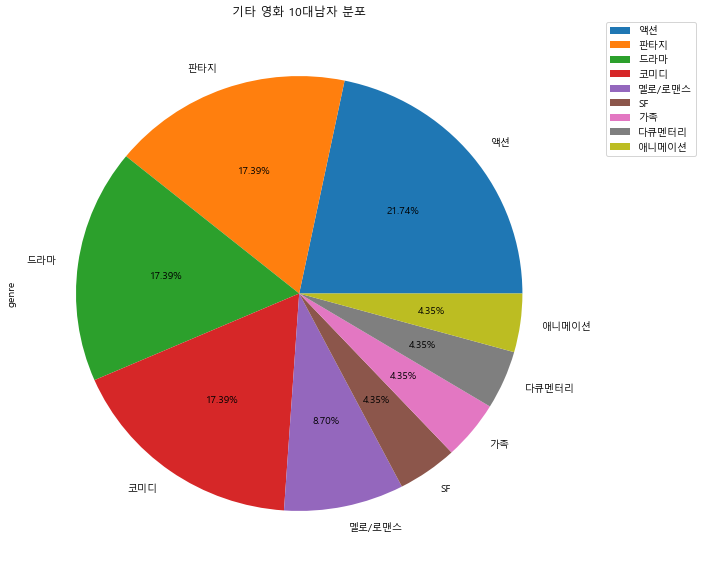

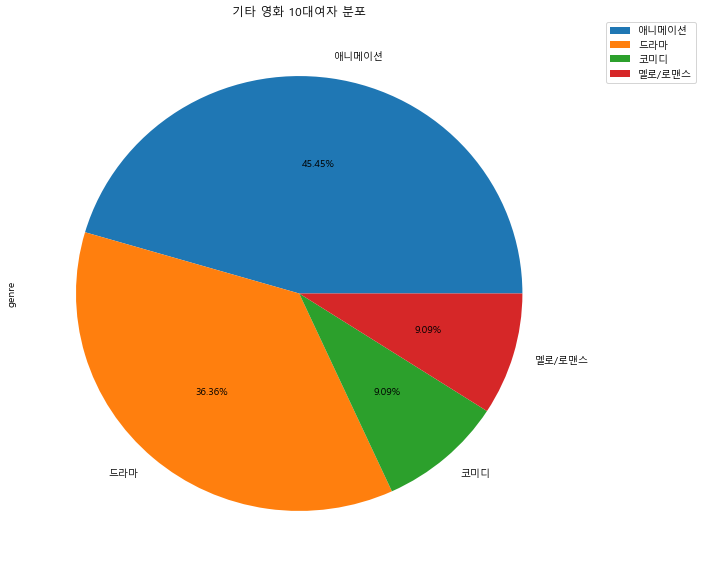

In [62]:
기타 = raw_data[raw_data['country'] == "기타"]
기타연령대 = 기타[기타['age'] == "10대 남자"]
기타연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
기타연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("기타 영화 10대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

기타 = raw_data[raw_data['country'] == "기타"]
기타연령대 = 기타[기타['age'] == "10대 여자"]
기타연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
기타연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("기타 영화 10대여자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 기타영화 20대 장르 분포

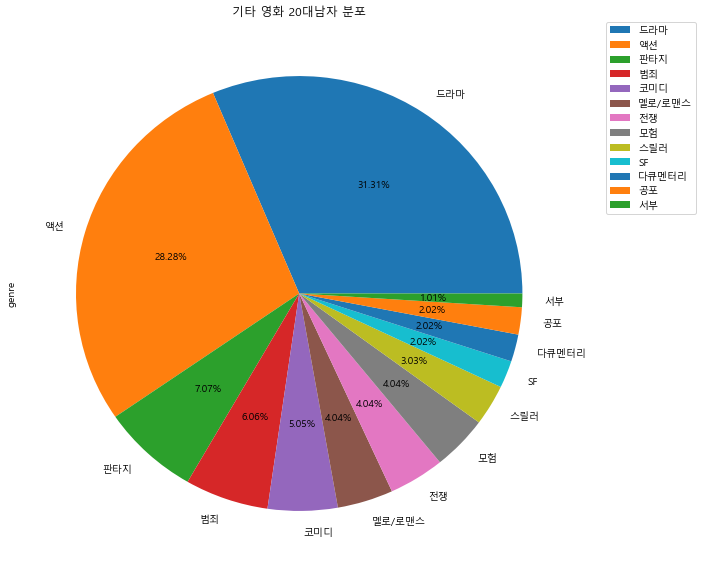

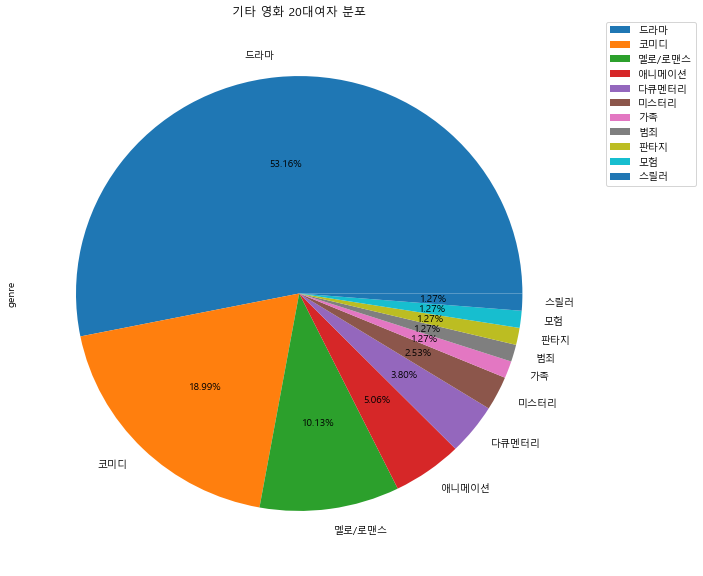

In [63]:
기타 = raw_data[raw_data['country'] == "기타"]
기타연령대 = 기타[기타['age'] == "20대 남자"]
기타연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
기타연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("기타 영화 20대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

기타 = raw_data[raw_data['country'] == "기타"]
기타연령대 = 기타[기타['age'] == "20대 여자"]
기타연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
기타연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("기타 영화 20대여자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 기타영화 30대 장르 분포

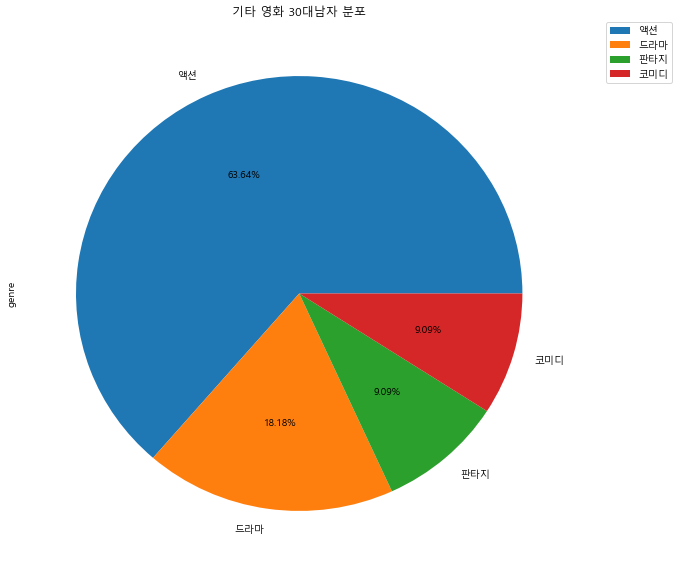

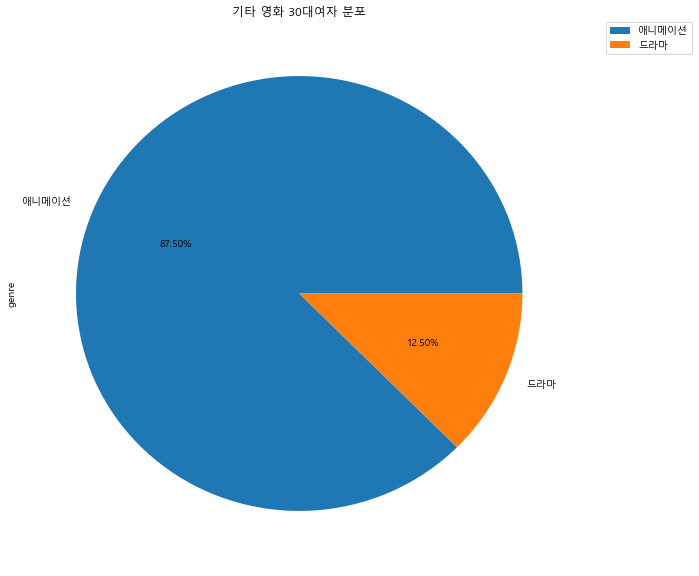

In [64]:
기타 = raw_data[raw_data['country'] == "기타"]
기타연령대 = 기타[기타['age'] == "30대 남자"]
기타연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
기타연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("기타 영화 30대남자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

기타 = raw_data[raw_data['country'] == "기타"]
기타연령대 = 기타[기타['age'] == "30대 여자"]
기타연령대.age.value_counts()

plt.figure(figsize=(10,10))
# g = plt.pie("country",hue="genre", data=df)
기타연령대['genre'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("기타 영화 30대여자 분포")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)